# Decision Tree Classification for jruby-1.1 Dataset

This notebook implements Decision Tree classification on the CSBBOOST-balanced jruby-1.1 dataset for software defect prediction.

In [2]:
dataset_name = "jruby-1.1"
method_name  = "csbboost"     
# ============================================================

# Generación automática de nombres de archivo (sin modificar flujo)
train_features_file = f"{dataset_name}-{method_name}-train-features-balanced-scaled.csv"
train_labels_file   = f"{dataset_name}-{method_name}-train-labels-balanced.csv"
test_features_file  = f"{dataset_name}-{method_name}-test-features-scaled.csv"
test_labels_file    = f"{dataset_name}-{method_name}-test-labels.csv"

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSBBOOST-Balanced Dataset

In [4]:
## Load CSBBOOST-Balanced Dataset
# Load training data (balanced and scaled)
train_df = pd.read_csv(train_labels_file)

if "class" in train_df.columns:
    y_train = train_df["class"]
else:
    # Por si en algún método el nombre cambia, usa la primera columna
    y_train = train_df.iloc[:, 0]

X_train = pd.read_csv(train_features_file)

# Load test data (scaled)
test_df = pd.read_csv(test_labels_file)

if "RealBug" in test_df.columns:
    y_test = test_df["RealBug"]
else:
    # Fallback genérico
    y_test = test_df.iloc[:, 0]

X_test = pd.read_csv(test_features_file)

print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set shape: (584, 65)
Training labels shape: (584,)
Test set shape: (147, 65)
Test labels shape: (147,)

Training set class distribution:
RealBug
0    292
1    292
Name: count, dtype: int64

Test set class distribution:
RealBug
0    130
1     17
Name: count, dtype: int64


## Decision Tree Model Implementation

In [5]:
# Initialize Decision Tree with default parameters
dt_model = DecisionTreeClassifier(random_state=42)

print("Decision Tree Model Configuration:")
print(f"Algorithm: Decision Tree Classifier")
print(f"Criterion: {dt_model.criterion}")
print(f"Max depth: {dt_model.max_depth}")
print(f"Min samples split: {dt_model.min_samples_split}")
print(f"Min samples leaf: {dt_model.min_samples_leaf}")
print(f"Random state: {dt_model.random_state}")

Decision Tree Model Configuration:
Algorithm: Decision Tree Classifier
Criterion: gini
Max depth: None
Min samples split: 2
Min samples leaf: 1
Random state: 42


## Model Training

In [6]:
# Train the Decision Tree model
print("Training Decision Tree model...")
dt_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nModel trained on {X_train.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {dt_model.n_classes_}")
print(f"Classes: {dt_model.classes_}")
print(f"\nTree Structure:")
print(f"- Tree depth: {dt_model.tree_.max_depth}")
print(f"- Number of leaves: {dt_model.tree_.n_leaves}")
print(f"- Total nodes: {dt_model.tree_.node_count}")

Training Decision Tree model...
Training completed!

Model trained on 584 samples
Number of features: 65
Number of classes: 2
Classes: [0 1]

Tree Structure:
- Tree depth: 11
- Number of leaves: 36
- Total nodes: 71


## Model Evaluation

In [7]:
# Generate predictions
y_pred = dt_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

print("Decision Tree Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Decision Tree Performance Metrics:
Accuracy:  0.8367
Precision: 0.3600
Recall:    0.5294
F1-Score:  0.4286


In [8]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       130
           1       0.36      0.53      0.43        17

    accuracy                           0.84       147
   macro avg       0.65      0.70      0.67       147
weighted avg       0.87      0.84      0.85       147



## Confusion Matrix

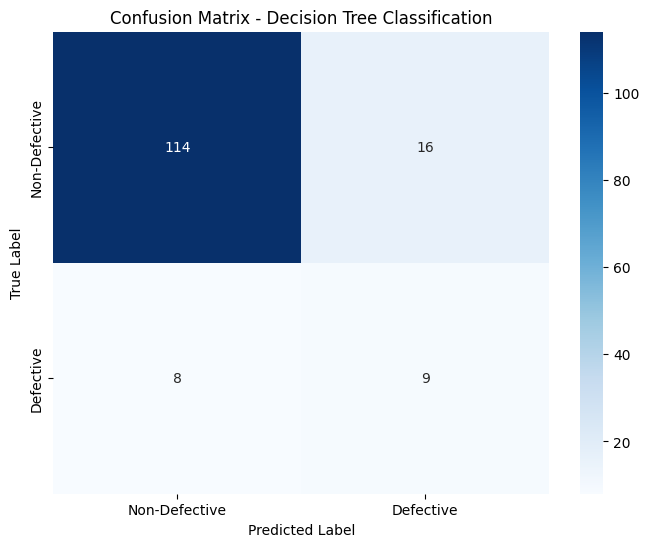


Confusion Matrix:
True Label vs Predicted Label
                 Non-Defective  Defective
Non-Defective         114          16    
Defective              8            9    


In [9]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.title('Confusion Matrix - Decision Tree Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print("True Label vs Predicted Label")
print(f"                 Non-Defective  Defective")
print(f"Non-Defective    {cm[0,0]:^13}  {cm[0,1]:^9}")
print(f"Defective        {cm[1,0]:^13}  {cm[1,1]:^9}")

## Feature Importance Analysis

Top 15 Most Important Features:
DDEV                           0.5342
MAJOR_COMMIT                   0.0691
OWN_COMMIT                     0.0573
CountLine                      0.0518
OWN_LINE                       0.0396
CountClassCoupled              0.0292
AvgLine                        0.0266
CountInput_Min                 0.0241
CountDeclClassVariable         0.0221
Del_lines                      0.0156
CountDeclInstanceVariable      0.0142
CountStmtExe                   0.0121
CountDeclClassMethod           0.0118
AvgLineComment                 0.0112
CountLineCodeExe               0.0112


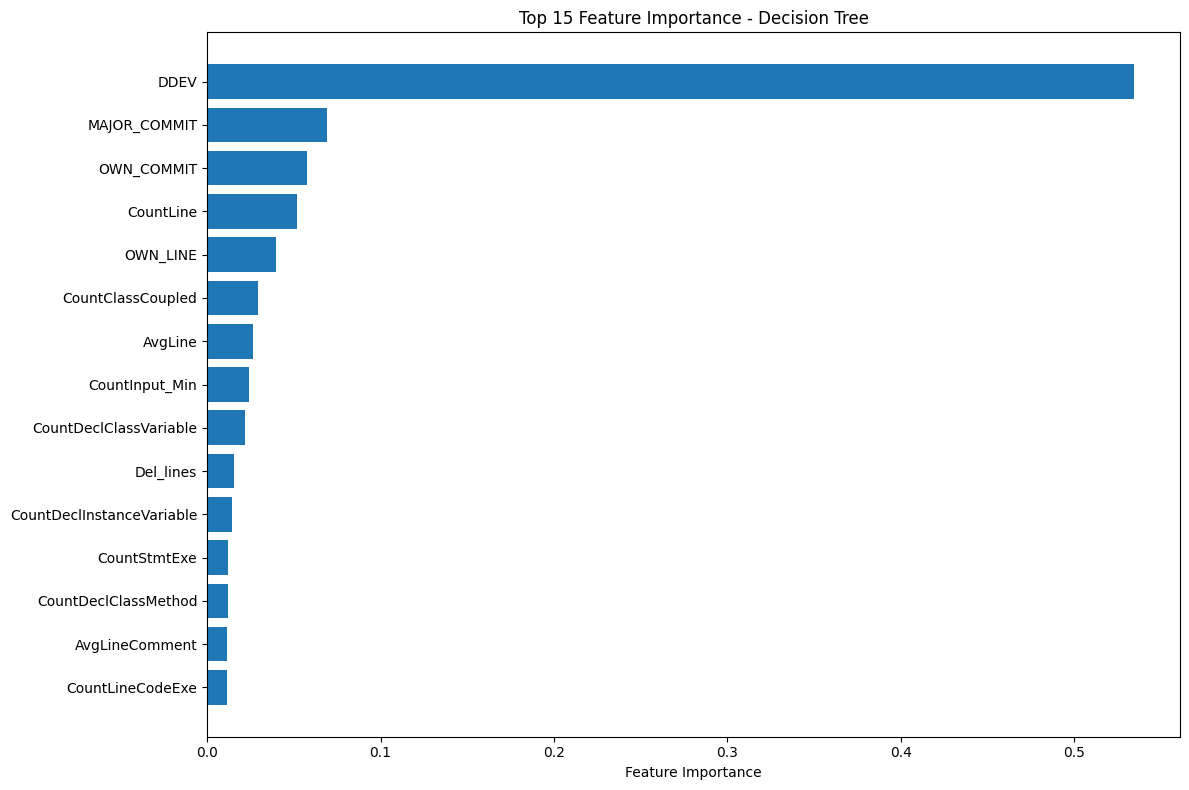


Cumulative Importance Analysis:

Top features accounting for ≥85% cumulative importance:

9 features explain 0.8539 of total importance:
  DDEV                           0.5342
  MAJOR_COMMIT                   0.0691
  OWN_COMMIT                     0.0573
  CountLine                      0.0518
  OWN_LINE                       0.0396
  CountClassCoupled              0.0292
  AvgLine                        0.0266
  CountInput_Min                 0.0241
  CountDeclClassVariable         0.0221


In [10]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print("=" * 40)
for i, row in feature_importance.head(15).iterrows():
    print(f"{row['feature']:<30} {row['importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\nCumulative Importance Analysis:")
cumulative_importance = feature_importance['importance'].cumsum()

print(f"\nTop features accounting for ≥85% cumulative importance:")
for i, cum_imp in enumerate(cumulative_importance):
    if cum_imp >= 0.85:
        top_85_features = feature_importance.head(i+1)
        print(f"\n{i+1} features explain {cum_imp:.4f} of total importance:")
        for idx, row in top_85_features.iterrows():
            print(f"  {row['feature']:<30} {row['importance']:.4f}")
        break
    

## Tree Structure Analysis

In [11]:
# Analyze tree structure
tree = dt_model.tree_

print("Decision Tree Structure Analysis:")
print("=" * 40)
print(f"Maximum depth: {tree.max_depth}")
print(f"Number of leaves: {tree.n_leaves}")
print(f"Total nodes: {tree.node_count}")
print(f"\nTree Complexity:")
if tree.max_depth <= 10:
    print(f"- Shallow tree (depth ≤ 10): Good interpretability")
elif tree.max_depth <= 20:
    print(f"- Medium tree (10 < depth ≤ 20): Moderate interpretability")
else:
    print(f"- Deep tree (depth > 20): Limited interpretability, risk of overfitting")

print(f"\nLeaf Distribution:")
print(f"- Average samples per leaf: {X_train.shape[0] / tree.n_leaves:.1f}")
print(f"- Leaf density: {tree.n_leaves / tree.node_count * 100:.1f}%")

# Show sample decision path (first few nodes)
print(f"\nSample Decision Rules (first 5 splits):")
feature_names = X_train.columns
for i in range(min(5, tree.node_count)):
    if tree.children_left[i] != tree.children_right[i]:  # Not a leaf
        feature_idx = tree.feature[i]
        threshold = tree.threshold[i]
        feature_name = feature_names[feature_idx]
        print(f"Node {i}: If {feature_name} <= {threshold:.4f}")

Decision Tree Structure Analysis:
Maximum depth: 11
Number of leaves: 36
Total nodes: 71

Tree Complexity:
- Medium tree (10 < depth ≤ 20): Moderate interpretability

Leaf Distribution:
- Average samples per leaf: 16.2
- Leaf density: 50.7%

Sample Decision Rules (first 5 splits):
Node 0: If DDEV <= -0.2394
Node 1: If MAJOR_COMMIT <= -0.6868
Node 2: If CountDeclClassVariable <= 0.3802
Node 3: If CountInput_Max <= -0.1476
Node 4: If CountDeclMethodDefault <= 0.9529


## Summary

In [13]:
# Summary of results
print(f"Decision Tree Classification Summary for {dataset_name}")
print("=" * 60)
print(f"Dataset: {dataset_name} ({method_name.upper()}-balanced)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nDecision Tree Configuration:")
print(f"- Algorithm: Decision Tree Classifier")
print(f"- Criterion: {dt_model.criterion}")
print(f"- Max depth: {dt_model.tree_.max_depth} (actual)")
print(f"- Total nodes: {dt_model.tree_.node_count}")
print(f"- Number of leaves: {dt_model.tree_.n_leaves}")
print(f"\nPerformance:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-Score: {f1:.4f}")
print(f"\nModel Characteristics:")
print(f"- Highly interpretable with clear decision rules")
print(f"- Provides feature importance rankings")
print(f"- No assumptions about data distribution")
print(f"- Can handle non-linear relationships")
print(f"- Fast training and prediction")
print(f"\nTop 3 Most Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"- {row['feature']}: {row['importance']:.4f}")

Decision Tree Classification Summary for jruby-1.1
Dataset: jruby-1.1 (CSBBOOST-balanced)
Training samples: 584
Test samples: 147
Features: 65

Decision Tree Configuration:
- Algorithm: Decision Tree Classifier
- Criterion: gini
- Max depth: 11 (actual)
- Total nodes: 71
- Number of leaves: 36

Performance:
- Accuracy: 0.8367
- Precision: 0.3600
- Recall: 0.5294
- F1-Score: 0.4286

Model Characteristics:
- Highly interpretable with clear decision rules
- Provides feature importance rankings
- No assumptions about data distribution
- Can handle non-linear relationships
- Fast training and prediction

Top 3 Most Important Features:
- DDEV: 0.5342
- MAJOR_COMMIT: 0.0691
- OWN_COMMIT: 0.0573
